# Hough Transform

**Name :** ROHIT G

**Reg.No :** 212222240083


In [49]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [50]:
road_image = cv2.imread('road1.webp')

In [51]:
color_image = cv2.cvtColor(road_image, cv2.COLOR_BGR2RGB)

In [52]:
gray_image = cv2.imread('road1.webp', cv2.IMREAD_GRAYSCALE)

(np.float64(-0.5), np.float64(899.5), np.float64(599.5), np.float64(-0.5))

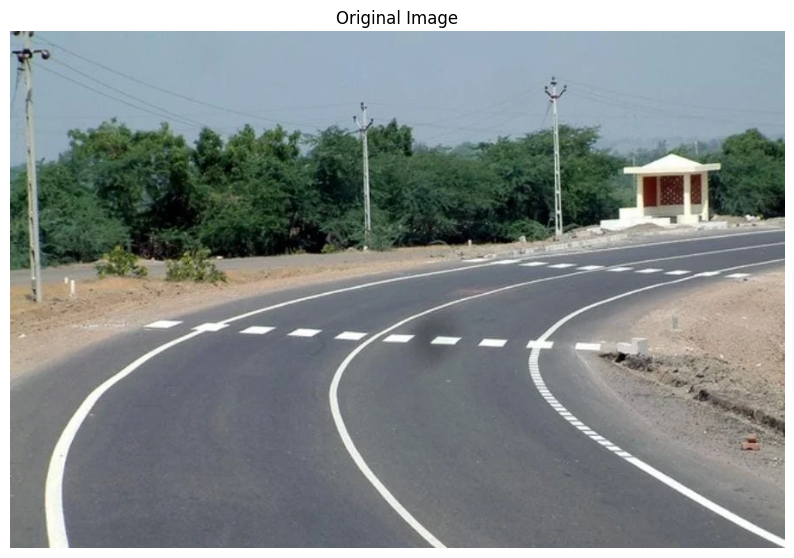

In [53]:
plt.figure(figsize=(10,10))
plt.imshow(road_image[:,:,::-1])
plt.title("Original Image")
plt.axis("off")

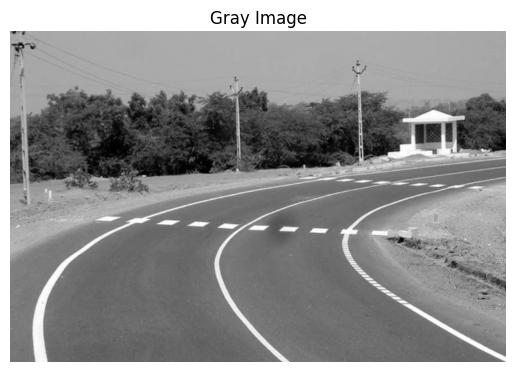

In [54]:
plt.imshow(gray_image, cmap='gray')
plt.title("Gray Image")
plt.axis("off")
plt.show()

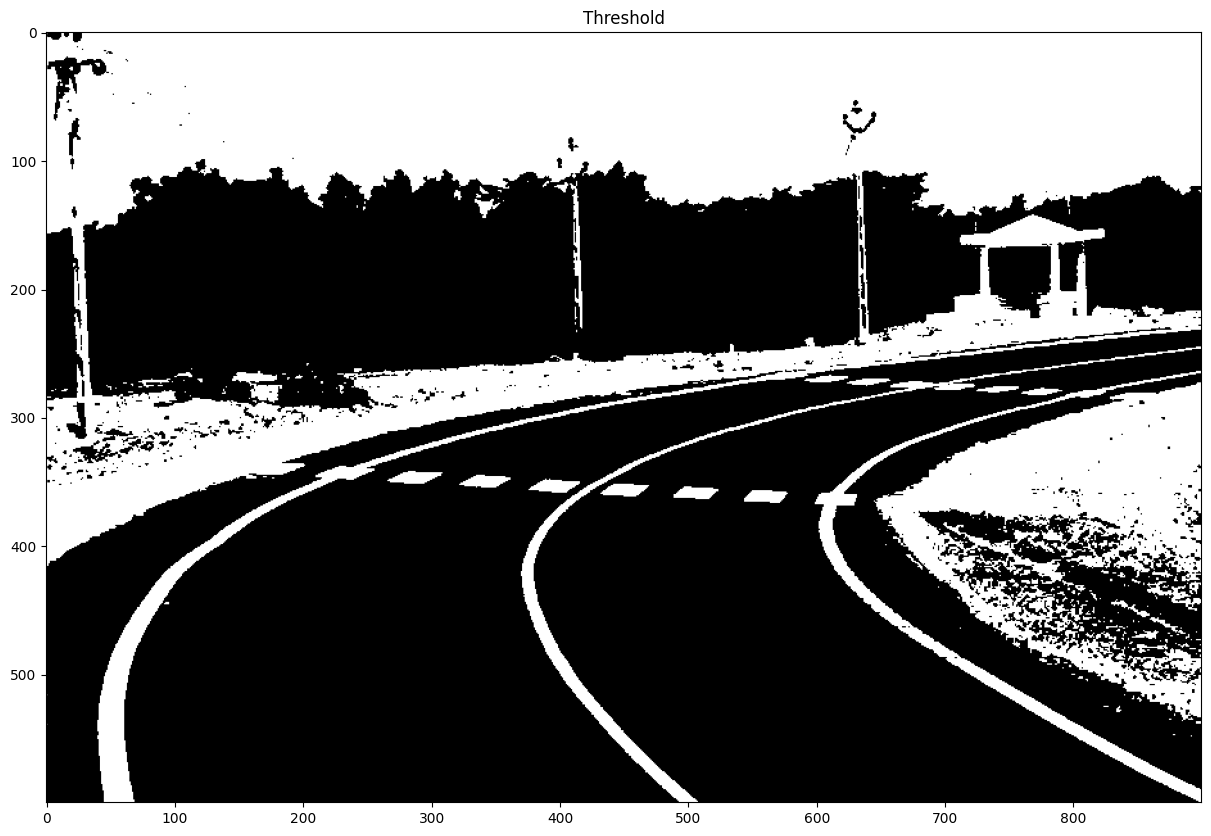

In [55]:
# Use global threshold based on grayscale intensity.
threshold = cv2.inRange(gray_image, 150, 255)

# Display images.
plt.figure(figsize = (20, 10))
plt.subplot(1,1,1); plt.imshow(threshold, cmap = 'gray'); plt.title('Threshold');

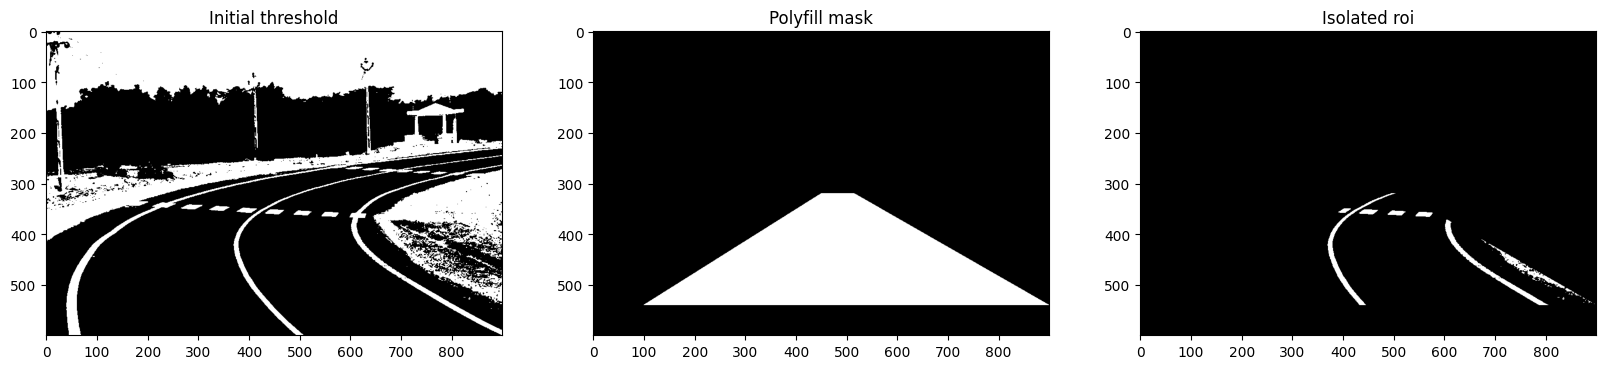

In [56]:
#  Region masking: Select vertices according to the input image.
roi_vertices = np.array([[[100, 540],
                          [900, 540],
                          [515, 320],
                          [450, 320]]])

# Defining a blank mask.
mask = np.zeros_like(threshold)   

# Defining a 3 channel or 1 channel color to fill the mask.
if len(threshold.shape) > 2:
    channel_count = threshold.shape[2]  # 3 or 4 depending on the image.
    ignore_mask_color = (255,) * channel_count
else:
    ignore_mask_color = 255

# Filling pixels inside the polygon.
cv2.fillPoly(mask, roi_vertices, ignore_mask_color)

# Constructing the region of interest based on where mask pixels are nonzero.
roi = cv2.bitwise_and(threshold, mask)

# Display images.
plt.figure(figsize = (20, 10))
plt.subplot(1,3,1); plt.imshow(threshold, cmap = 'gray'); plt.title('Initial threshold')
plt.subplot(1,3,2); plt.imshow(mask, cmap = 'gray');      plt.title('Polyfill mask')
plt.subplot(1,3,3); plt.imshow(roi, cmap = 'gray');       plt.title('Isolated roi');

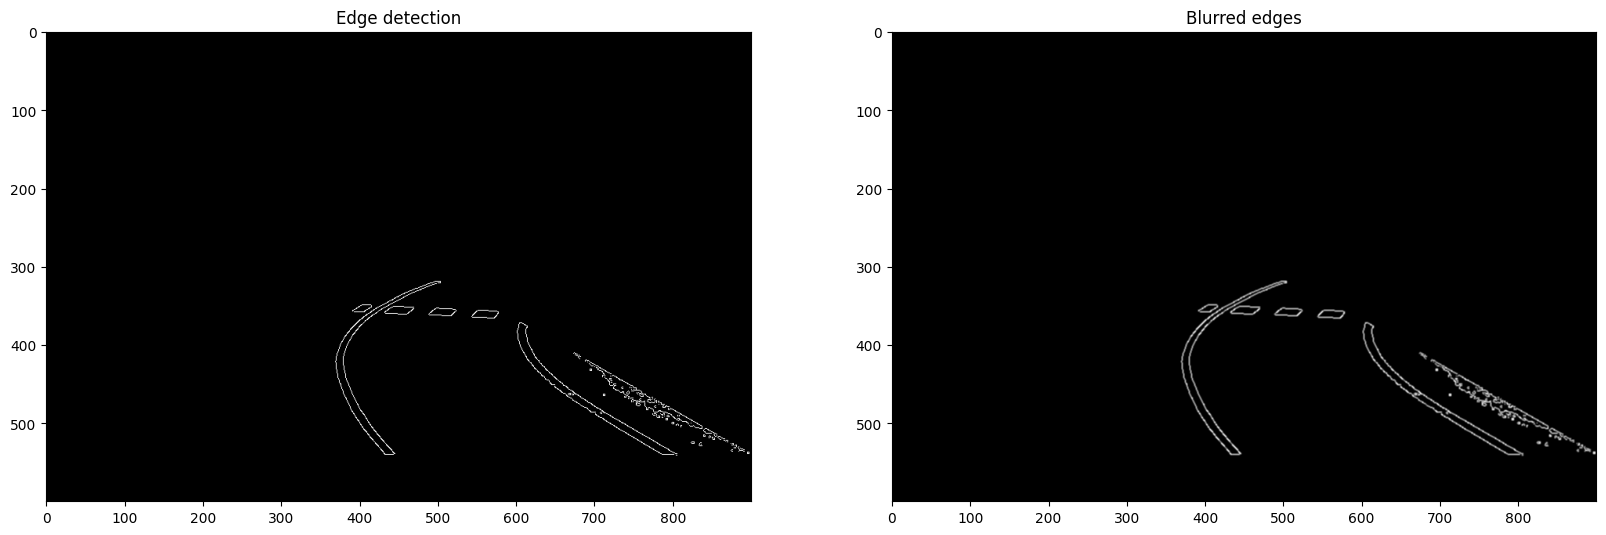

In [57]:
# Perform Edge Detection.
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(roi, low_threshold, high_threshold)

# Smooth with a Gaussian blur.
kernel_size = 3
canny_blur = cv2.GaussianBlur(edges, (kernel_size, kernel_size), 0)

# Display images.
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1); plt.imshow(edges, cmap = 'gray'); plt.title('Edge detection')
plt.subplot(1,2,2); plt.imshow(canny_blur, cmap = 'gray'); plt.title('Blurred edges');

In [58]:
def draw_lines(img, lines, color = [255, 0, 0], thickness = 2):
    """Utility for drawing lines."""
    if lines is not None:
        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(img, (x1, y1), (x2, y2), color, thickness)

Found 74 lines, including: [[604 371 615 377]]


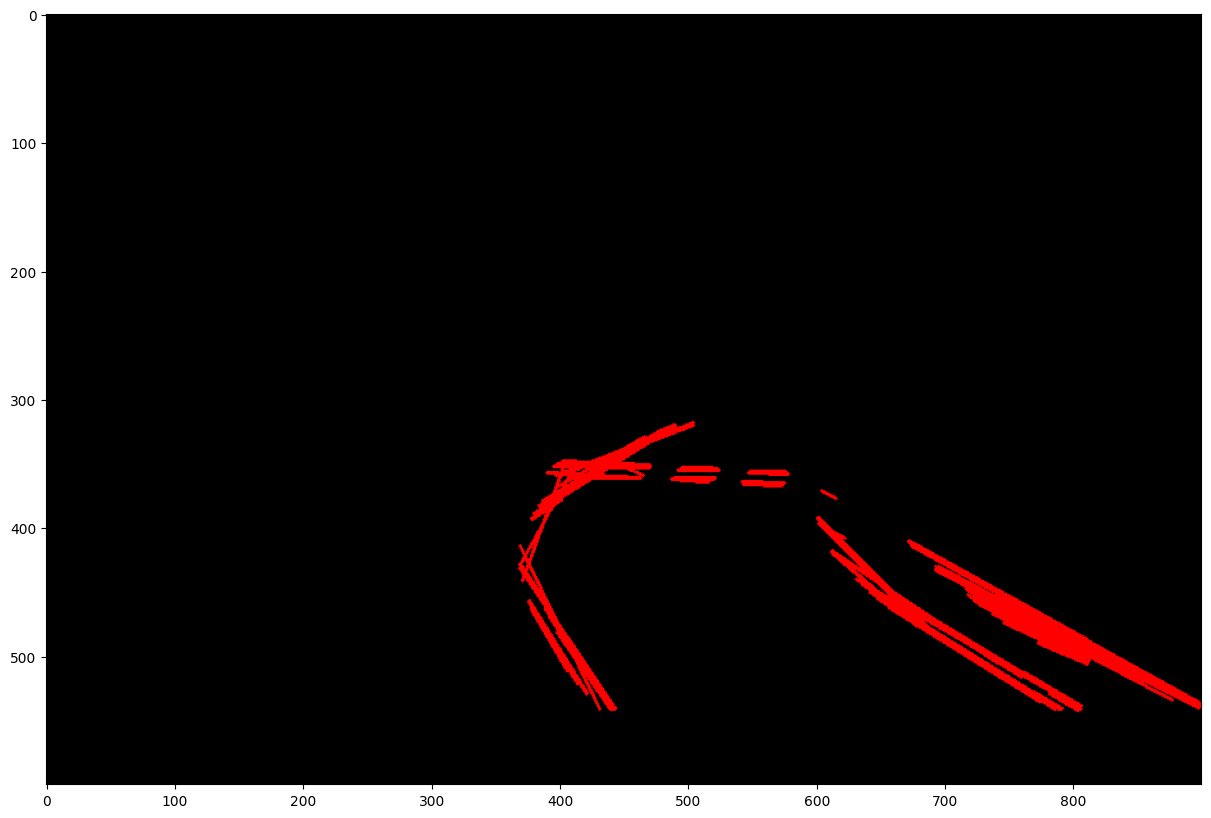

In [59]:
# Hough transform parameters set according to the input image.
rho = 1
theta = np.pi / 180
threshold = 50
min_line_len = 10
max_line_gap = 20

lines = cv2.HoughLinesP(
    canny_blur, rho, theta, threshold, minLineLength = min_line_len, maxLineGap = max_line_gap)

# Draw all lines found onto a new image.
hough = np.zeros((road_image.shape[0], road_image.shape[1], 3), dtype = np.uint8)
draw_lines(hough, lines)

print("Found {} lines, including: {}".format(len(lines), lines[0]))
plt.figure(figsize = (15, 10)); plt.imshow(hough);